In [1]:
# Installing Python Packages for data visualizations
%pip install pandas matplotlib seaborn numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing Python Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
dataset_path = r"H:\Documents\Master courses\Big Data & AI\1st - Big Data Introduction\1a-EDA\1-Class Challenge\1a-Insurance_medical_charges.csv"

df = pd.read_csv(dataset_path ,sep=';')

# Displaying the dataset
df.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


In [5]:
# Displaying the dataset
display(df)

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,no,northwest,10600.54830
1334,18,female,31.920,no,northeast,2205.98080
1335,18,female,36.850,no,southeast,1629.83350
1336,21,female,25.800,no,southwest,2007.94500


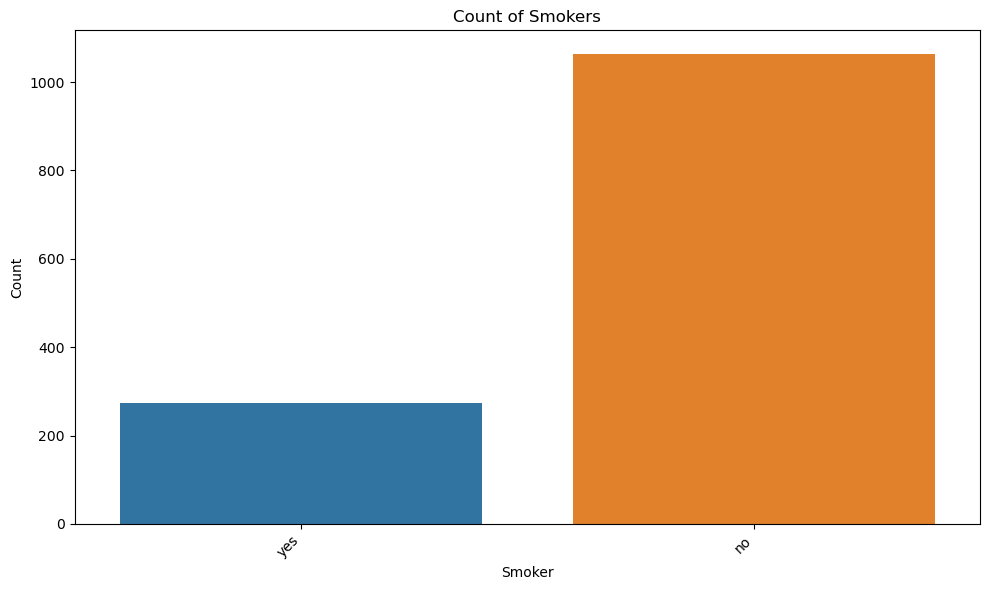

In [8]:
# Count Smokers
plt.figure(figsize=(10, 6))

# Sort experience levels by frequency
order = df['smoker'].value_counts().index

# Create count plot
sns.countplot(x='smoker', data=df, hue='smoker')
plt.title('Count of Smokers')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

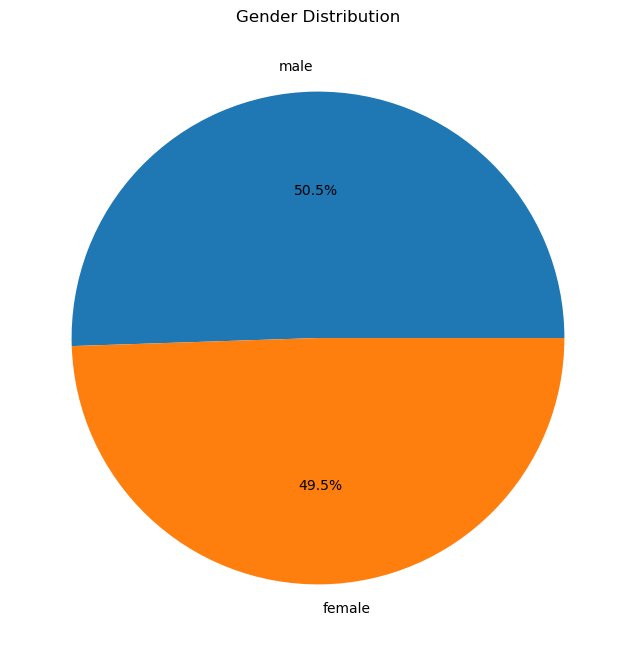

In [9]:
# Gender Distribution
company_size_counts = df['sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(company_size_counts, labels=company_size_counts.index, autopct='%1.1f%%', startangle=0)
plt.title('Gender Distribution')
plt.show()

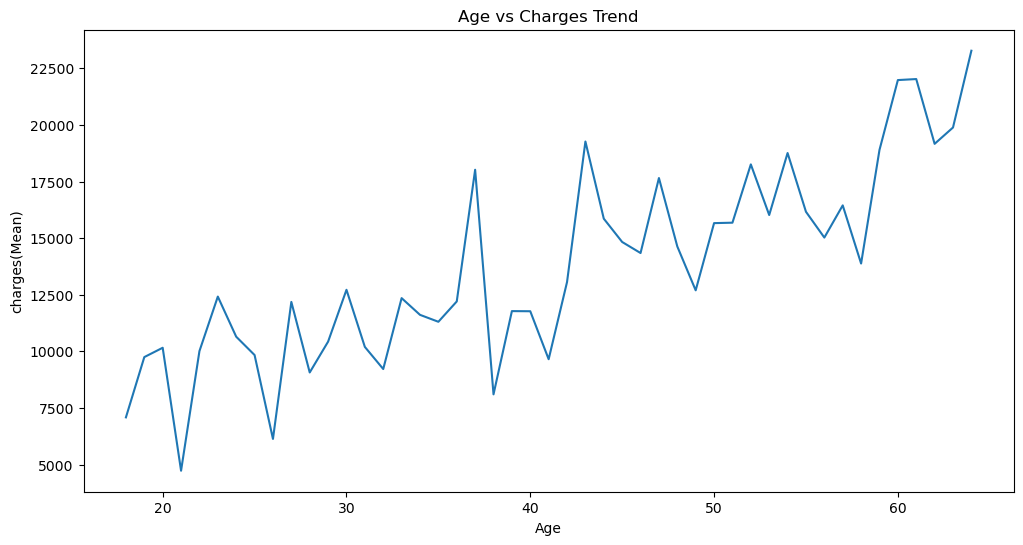

In [14]:

plt.figure(figsize=(12, 6))

sns.lineplot(x='age', y='charges', data=df.groupby('age')['charges'].mean().reset_index())

plt.title('Age vs Charges Trend')
plt.xlabel('Age')
plt.ylabel('charges(Mean)')
plt.show()

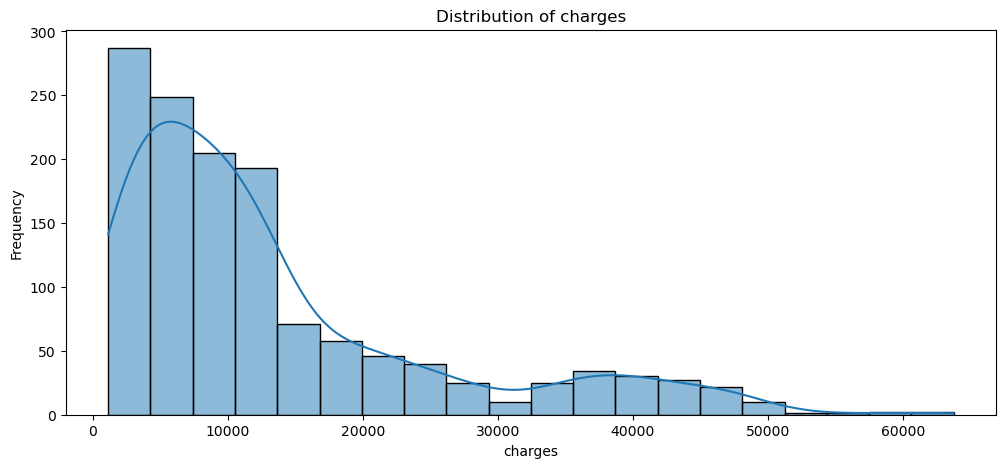

In [20]:
# Distribution of Charges
plt.figure(figsize=(12, 5))

# KDE line to visualize the distribution's shape
sns.histplot(df['charges'], bins=20, kde=True)

plt.title('Distribution of charges')
plt.xlabel('charges')
plt.ylabel('Frequency')
plt.show()

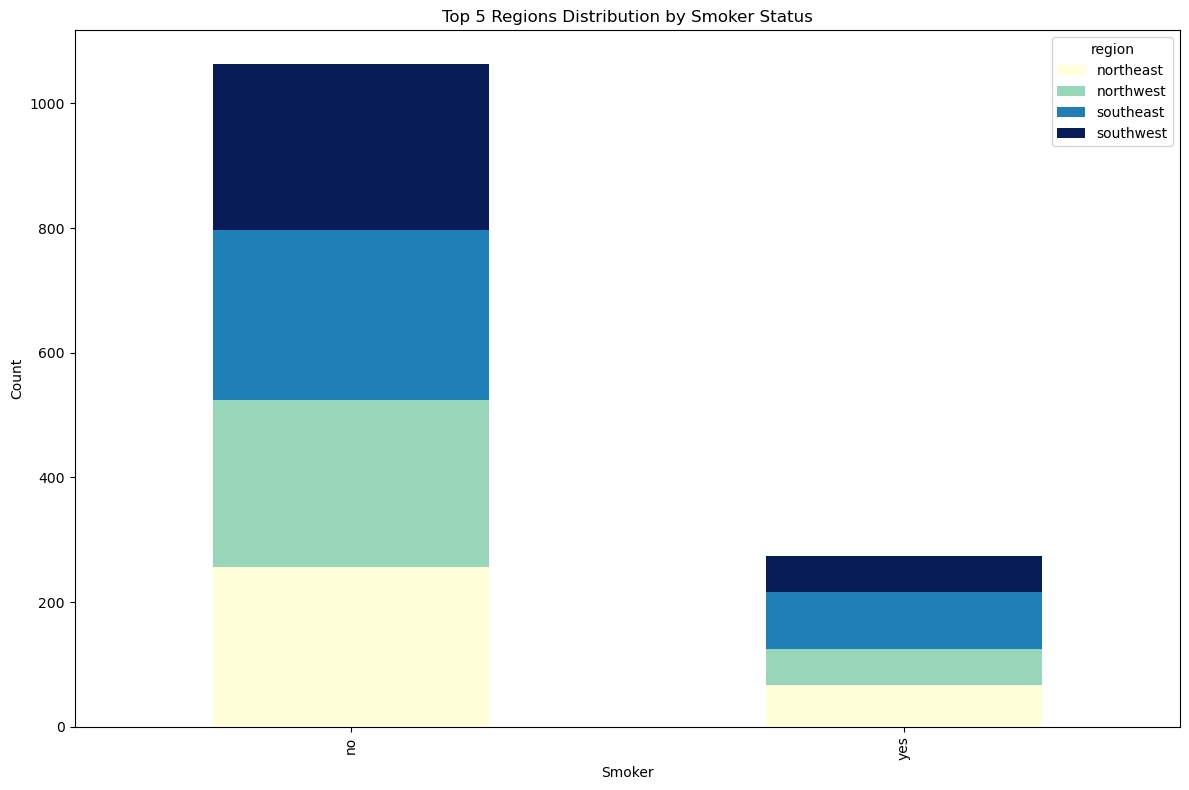

In [16]:
# Smoker Status by Region

top_regions = df['region'].value_counts().index[:5]

# Filter data for only those top regions
filtered_df = df[df['region'].isin(top_regions)]

# Group by smoker and region (so smokers on x-axis)
smoker_region_counts = filtered_df.groupby(['smoker', 'region']).size().unstack()

# Plot stacked bar chart
smoker_region_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='YlGnBu')
plt.title('Smoker Status by 5 Regions')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

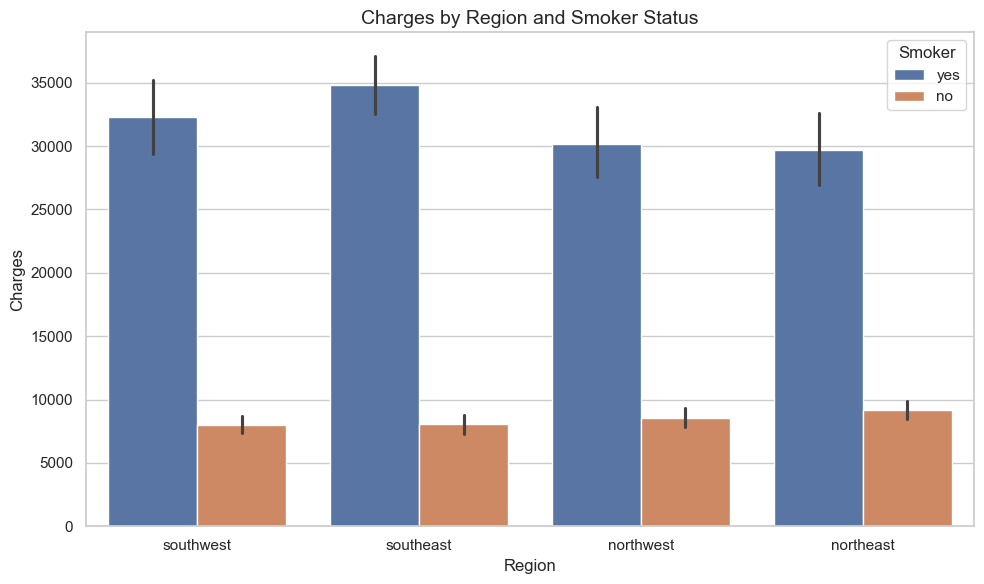

In [22]:


# Create grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='region',
    y='charges',
    hue='smoker',

)

# Chart details
plt.title('Charges by Region and Smoker Status', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.legend(title='Smoker')
plt.tight_layout()
plt.show()

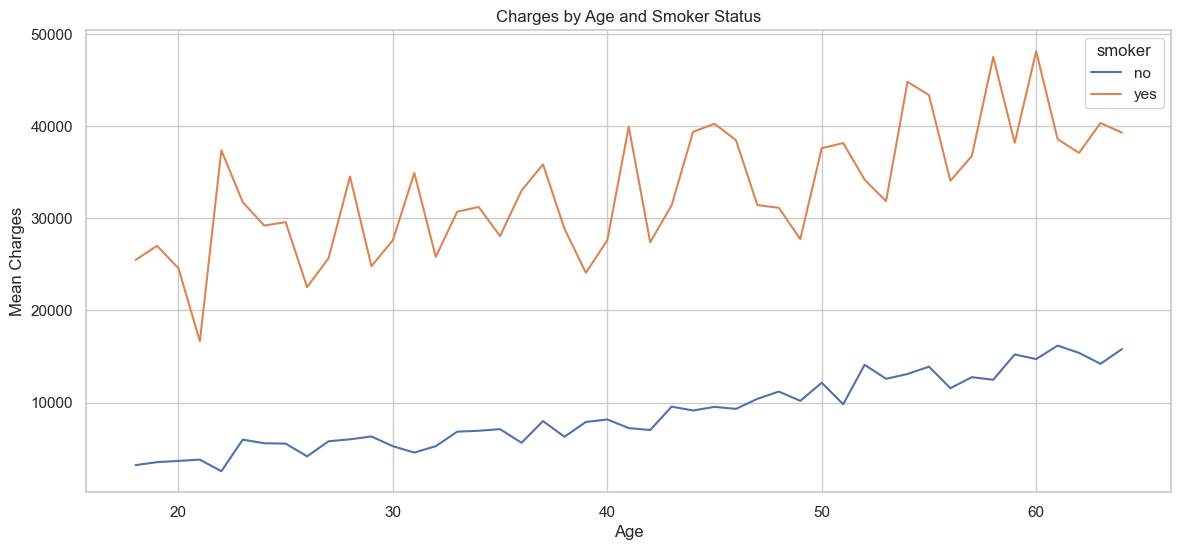

In [39]:
#  Charges by Age and Smoker Status
plt.figure(figsize=(14, 6))

# Group by age and smoker status, calculate mean charges
mean_charges = df.groupby(['age', 'smoker'])['charges'].mean().reset_index()

# Plot using seaborn
sns.lineplot(x='age', y='charges', hue='smoker',  data=mean_charges)

plt.title('Charges by Age and Smoker Status')
plt.xlabel('Age')
plt.ylabel('Mean Charges')
plt.show()

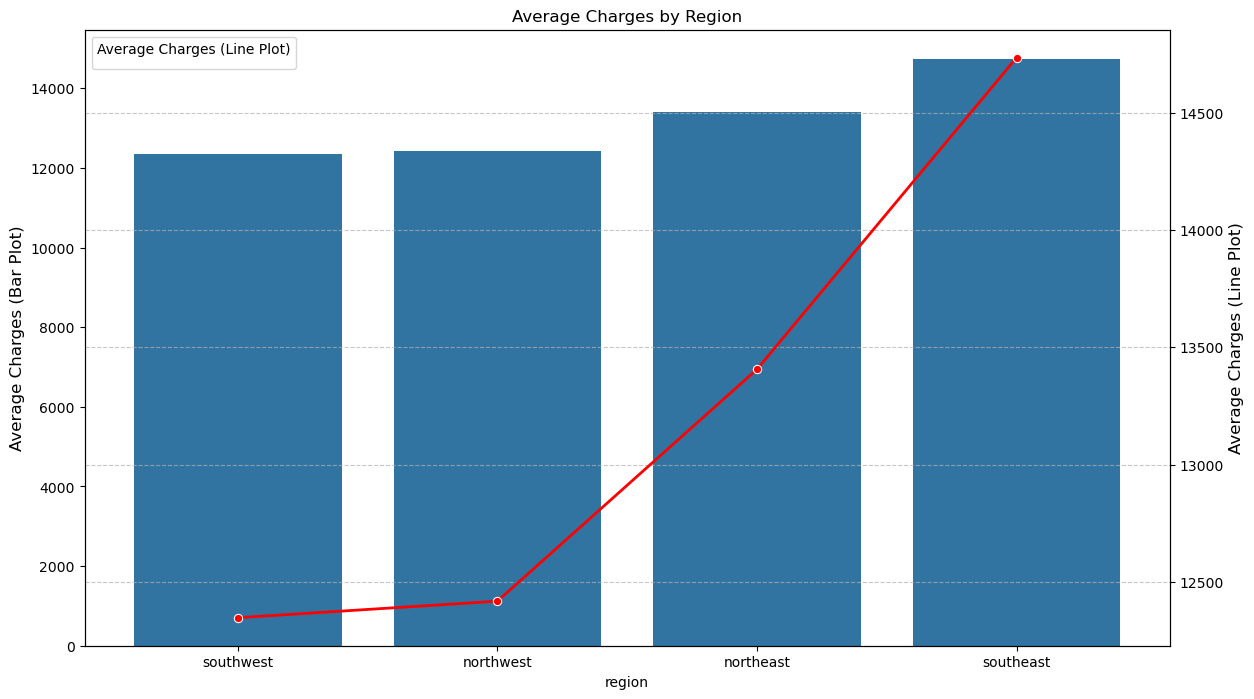

In [34]:
# Visualization 10: Combination of Bar and Line Plot - Average Charges by Region

# Group by region and compute average charges
avg_charges = df.groupby("region", as_index=False)["charges"].mean()

# Sort by charges (smallest to largest)
avg_charges = avg_charges.sort_values("charges", ascending=True)


fig, ax1 = plt.subplots(figsize=(14, 8))
sns.barplot(x='region', y='charges' , data=avg_charges,ax=ax1)
ax1.set_ylabel("Average Charges (Bar Plot)", fontsize=12)

ax2 = ax1.twinx()

sns.lineplot(
    data=avg_charges,
    x="region",
    y="charges",
    marker="o",
    color="red",
    linewidth=2,
    ax=ax2
)

ax2.set_ylabel("Average Charges (Line Plot)", fontsize=12)

plt.legend(
    title="Average Charges (Line Plot)",
    
    
)
plt.title("Average Charges by Region")
plt.xlabel("Region")

plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


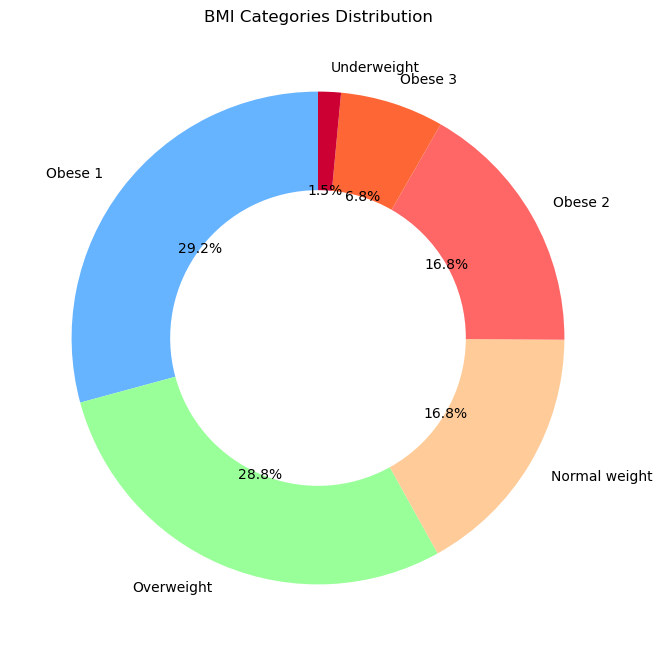

In [36]:

def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal weight'
    elif bmi < 30:
        return 'Overweight'
    elif bmi < 35:
        return 'Obese 1'
    elif bmi < 40:
        return 'Obese 2'
    else:
        return 'Obese 3'

# Apply to dataframe
df['BMI_Category'] = df['bmi'].apply(bmi_category)

bmi_counts = df['BMI_Category'].value_counts()


# Donut chart
plt.figure(figsize=(8, 8))
colors = ['#66b3ff','#99ff99','#ffcc99','#ff6666','#ff6636','#cc0033']  # optional custom colors
plt.pie(
    bmi_counts,
    labels=bmi_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width':0.4}  # this makes it a donut
)
plt.title("BMI Categories Distribution")
plt.show()

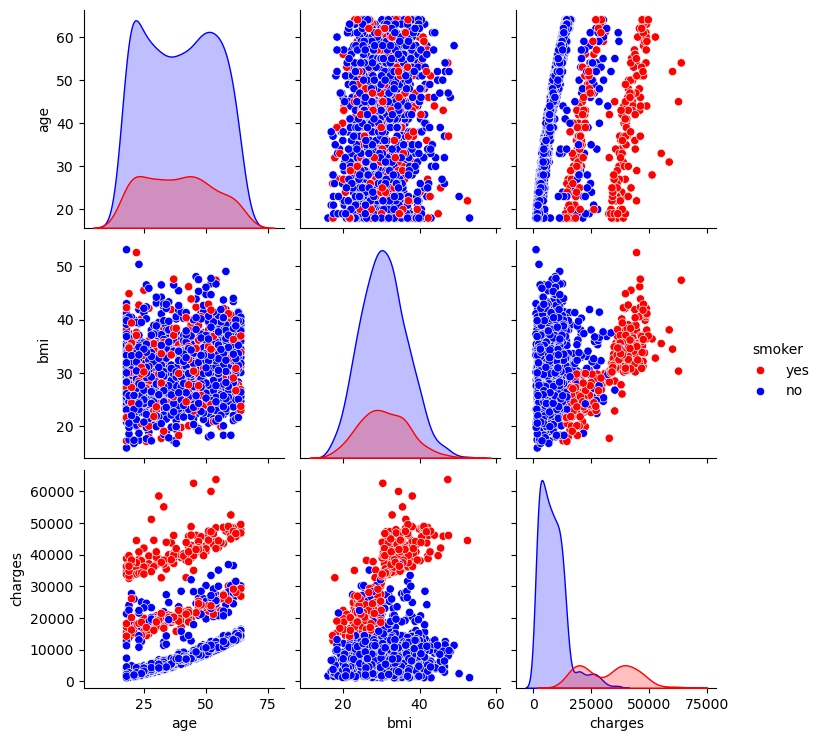

In [40]:

import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
subset = df[['age', 'bmi', 'charges', 'smoker']]

# Pairplot with hue by smoker
sns.pairplot(subset, hue='smoker', palette={'yes':'red','no':'blue'}, diag_kind='kde')


plt.show()


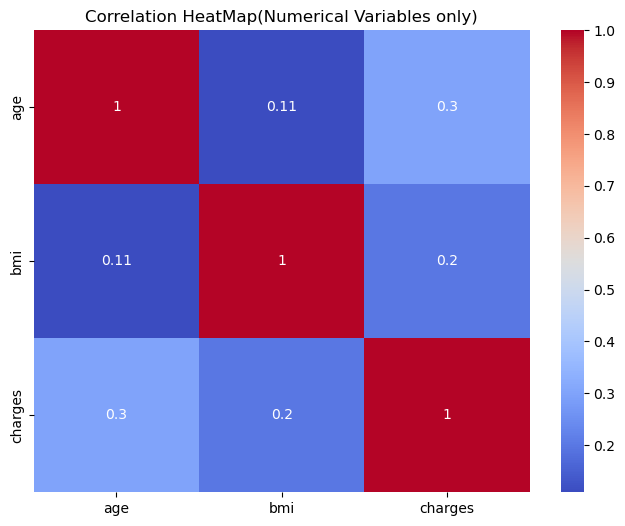

In [44]:
numerical_cols = df.select_dtypes(include='number')

correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation HeatMap(Numerical Variables only)")
plt.show()

In [ ]:
# Charges by age group
df['age_group'] = pd.cut(df.age, bins=[0, 19, 29, 39, 49, 59, 200], right=True, labels=['under 20', '20-30', '30-40', '40-50', '50-60' , 'over 60'])


